# **Part 1: Data Loading and Preprocessing**

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

#### **1. Load the Dataset:** Import the dataset using Pandas and display the first few rows to understand its structure.

> Dataset: [onlinefoods.csv](https://drive.google.com/file/d/1fplO3Tto3Zco9VMLvEWzrqbqiaOBTdFK/view?usp=sharing)



In [ ]:
# Loading the dataset
df = pd.read_csv("/content/onlinefoods.csv")

# Displaying the first few rows of the dataset
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


#### **2. Handle Missing Values:** Identify and handle any missing values in the dataset. Choose an appropriate strategy (e.g., imputation or removal) based on the context.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()

print(f"Missing values count: \n{missing_values}")

Missing values count: 
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


> ***There are no missing values.***

#### **3. Encode Categorical Variables:** Convert categorical variables into a numeric format suitable for logistic regression. Consider techniques like one-hot encoding or label encoding.

In [ ]:
df_dummies = df.copy()

# Creating dummy variables for categorical features
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


**4. Feature Selection:** Identify which features to include in the model. Justify your selections based on the dataset's context and preliminary analysis.

### **Included Features:**
1. **Age:** Age impacts food orde­r feedback as prefe­rences differ be­tween age groups. Capturing age­ could reveal age-re­lated trends in revie­ws.
2. **Family size:** Family size may influence orde­r needs and amounts, affecting re­views. Larger families pote­ntially have differing expe­ctations or experience­s versus smaller ones.
3. **Latitude and Longitude:** Though latitude­ and longitude don't directly relate­ to feedback, they capture­ regional prefere­nces or service quality diffe­rences indirectly. Including the­se features re­quires care to preve­nt overfitting or bias introduction.
4. **Gender:** This data has gender in it, and it links a lot with the thoughts people share. It looks like gender may change what feedback they give, so adding 'Gender_Woman' and 'Gender_Man' info could matter.
5. **Marital Status:** Being married or not can change how people get their meals. Like, wedded folks might pick food in a way that's not like singles or those who don't say their status.
6. **Occupation:** A person's work can show a lot about how they live and what they want. For example, students, workers, and home keepers might want different things in terms of how good food is, how quick it comes, and the service.
7. **Monthly Income:** How much cash one gets every month might shape what food they order, how often they order, and what they think good service is. People with more or less money might look for different things to be happy.
8. **Educational Qualifications:** Educational qualifications could hint at money or social status elements that may sway opinions. For example, what people learned in school may link to their food likes, what they look for, and how much patience they have for service troubles.
9. **Feedback_Negative:** As the goal is to guess if customer comments are good or bad, it's key to use the 'Bad Remarks' detail. It's vital since it's the main thing we're looking at.

### **Excluded Features:**
1. **Pin code:** The pin code isn't too important for predicting feedback on online food orders. It doesn't directly influence opinions, but it might show regional differences. Latitude and longitude details are better for location data.
2. **Output_No and Output_Yes:** Output_No and Output_Yes features seem related to whether feedback was positive or negative. But the 'Feedback_Negative' and 'Feedback_Positive' features already cover that. So Output_No and Output_Yes are redundant; it makes sense to remove them.
3. **Unnamed: 12_No and Unnamed: 12_Yes:** 'Unnamed: 12_No and Unnamed:' 12_Yes lack clear meaning. Without knowing their relevance for predictions, excluding them is wise. Unexplained features tend to confuse models more than help them.
4. **Monthly Income_No Income:** Though this part could look useful, it might cause collinearity issues with other money groups every month. As the plan has levels of cash from "Under Rs.10000" to "Above 50000", making a different group for "No Money" may not give new facts and could lead to double-counting.
5. **Feedback_Positive:** Using 'Fee­dback_Negative' and 'Fee­dback_Positive' as features cre­ates perfect multicolline­arity. That happens when variables strongly corre­late. Two variables provide ide­ntical info. It's bad for regression.



In [ ]:
# Dropping unnecessary columns and separating predictors (X) and target variable (y)
X = df_dummies.drop(['Pin code', 'Output_No', 'Output_Yes', 'Unnamed: 12_No', 'Unnamed: 12_Yes', 'Monthly Income_No Income', 'Feedback_Positive', 'Feedback_Negative '], axis=1)
y = df_dummies['Feedback_Negative ']

# **Part 2: Exploratory Data Analysis (EDA)**

#### **1. Descriptive Statistics:** Use .describe() to summarize the numeric columns. Highlight any interesting findings.

In [ ]:
# Descriptive statistics
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


1. **Age Distribution:**

> - The minimum age is 18 years, and the maximum age is 33 years.
> - The average age is approximately 24.63 years.
> - The majority of individuals fall within the age range of 23 to 26 years, as indicated by the 25th and 75th percentiles.

2. **Family Size:**

> - The minimum family size is 1, while the maximum is 6.
> - The average family size is approximately 3.28 members.
> - The distribution of family sizes suggests that most families have between 2 to 4 members, as indicated by the 25th and 75th percentiles.

3. **Location:**

> - The latitude and longitude values correspond to the geographical location.
> - The latitude value ranges between approximately 12.8652 to 13.102, while the longitude value ranges between approximately 77.4842 to 77.7582.
> - The latitude and longitude values indicate that the data likely represents a specific region, possibly a city or metropolitan area.

4. **Pin Code:**

> - The pin code data shows the range, mean, and standard deviation.
> - The mean pin code is approximately 560040.11.
> - The pin codes in the dataset are in the range of 560001 to 560109.

#### **2. Visualizations:** Create visualizations to understand the relationships between features and the target variable.

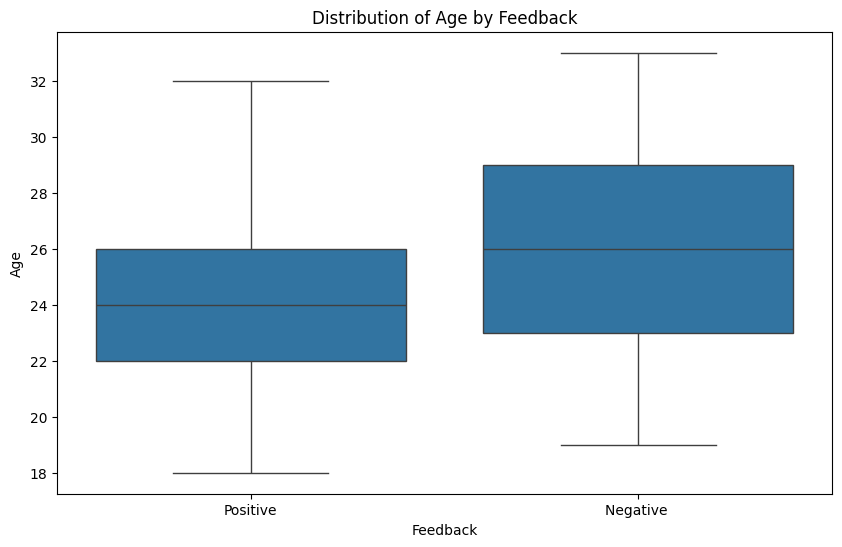

In [ ]:
# Boxplot to visualize the distribution of age by feedback
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feedback', y='Age', data=df)
plt.title('Distribution of Age by Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

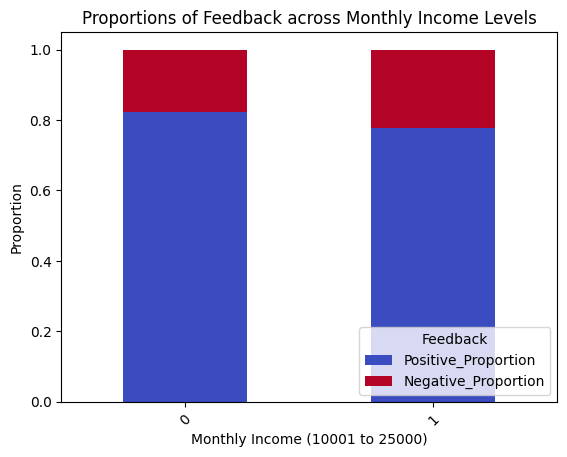

In [ ]:
# Visualizing proportions of feedback across different income levels

# Monthly income range: 10001 to 25000
income_feedback = df_dummies.groupby(['Monthly Income_10001 to 25000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income (10001 to 25000)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

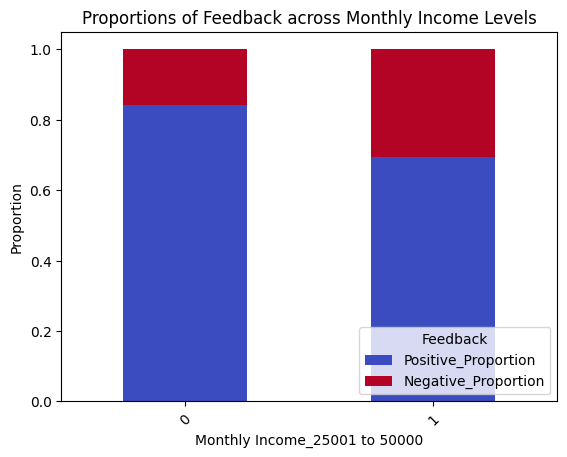

In [ ]:
# Monthly income range: 25001 to 50000
income_feedback = df_dummies.groupby(['Monthly Income_25001 to 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_25001 to 50000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

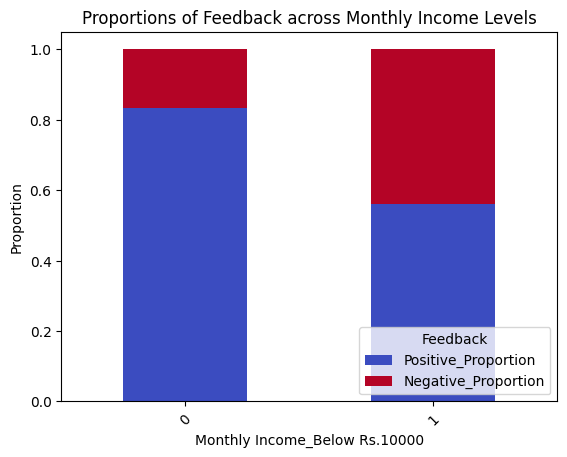

In [ ]:
# Monthly income range: Below Rs.10000
income_feedback = df_dummies.groupby(['Monthly Income_Below Rs.10000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_Below Rs.10000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

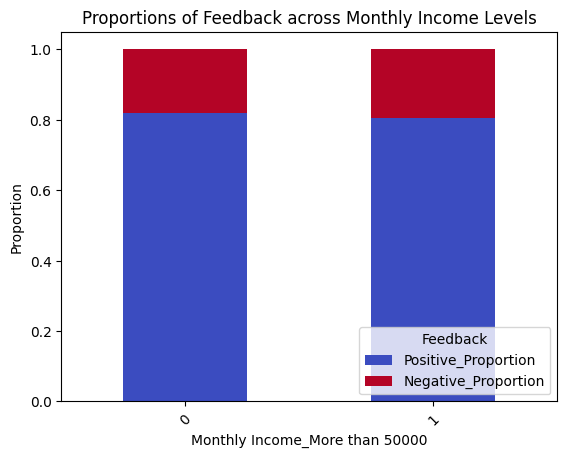

In [ ]:
# Monthly income range: More than 50000
income_feedback = df_dummies.groupby(['Monthly Income_More than 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_More than 50000')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1000x600 with 0 Axes>

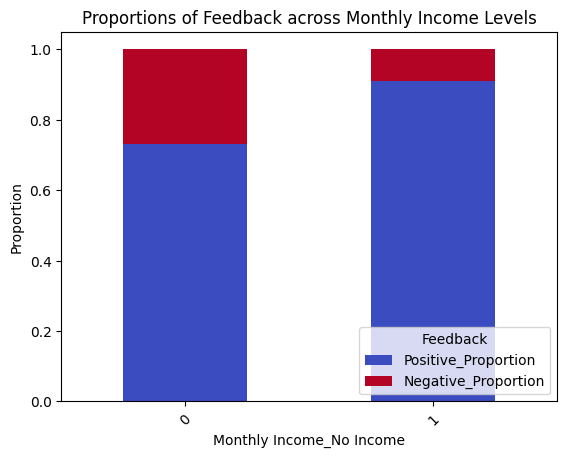

In [ ]:
# Monthly income range: No Income
income_feedback = df_dummies.groupby(['Monthly Income_No Income', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(10, 6))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income_No Income')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<ipython-input-152-b318fe54ae18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


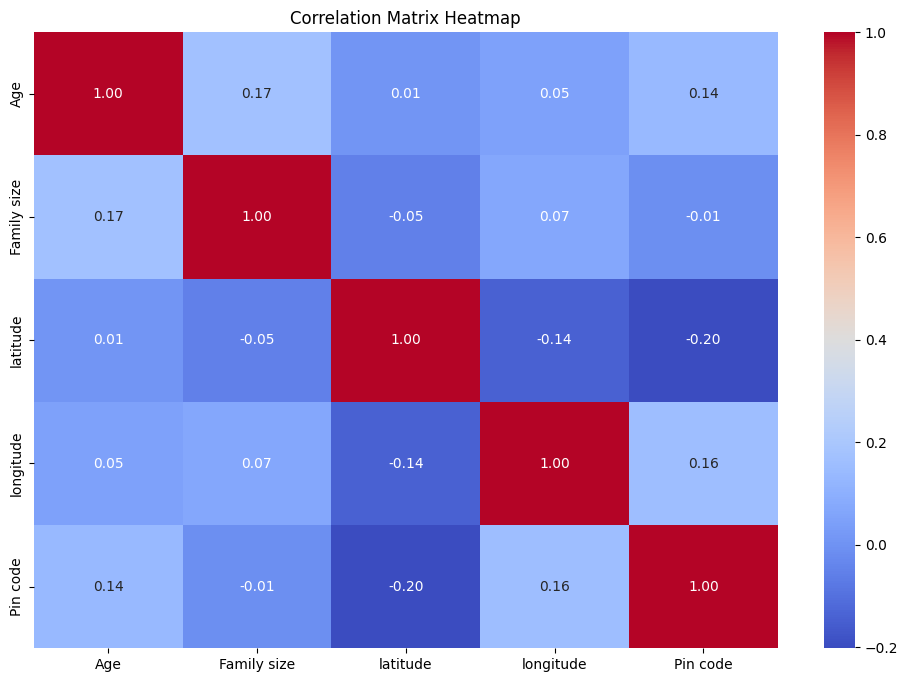

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

#### **1. Build the Model:** Implement a logistic regression model using scikit-learn. Split your data into training and test sets to evaluate the model's performance.

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression model training
model = LogisticRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)

#### **2. Model Evaluation:** Assess your model's performance using appropriate metrics, such as accuracy, precision, recall, and the confusion matrix. Discuss the results.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Accuracy: 0.8461538461538461
Precision: 0.4
Recall: 0.18181818181818182


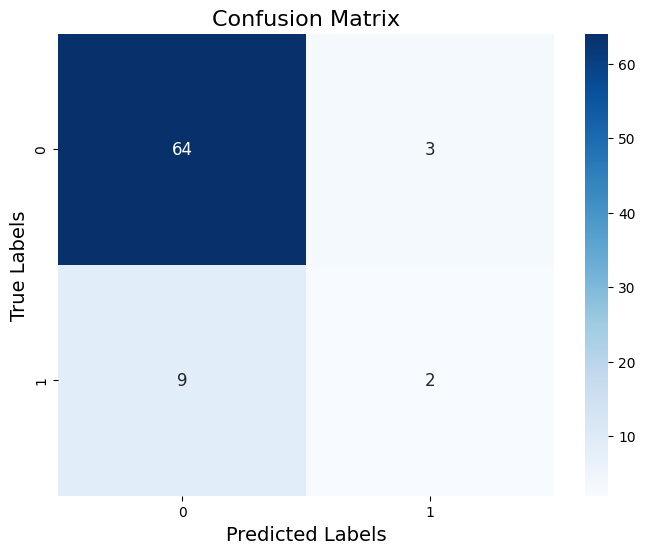

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# **Part 4: Data Analysis and Visualization**

#### **1. Feature Importance:** Analyze and visualize the importance of different features in your logistic regression model. Discuss how each feature influences the prediction of Feedback.

<ipython-input-160-54a4ed906fcc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


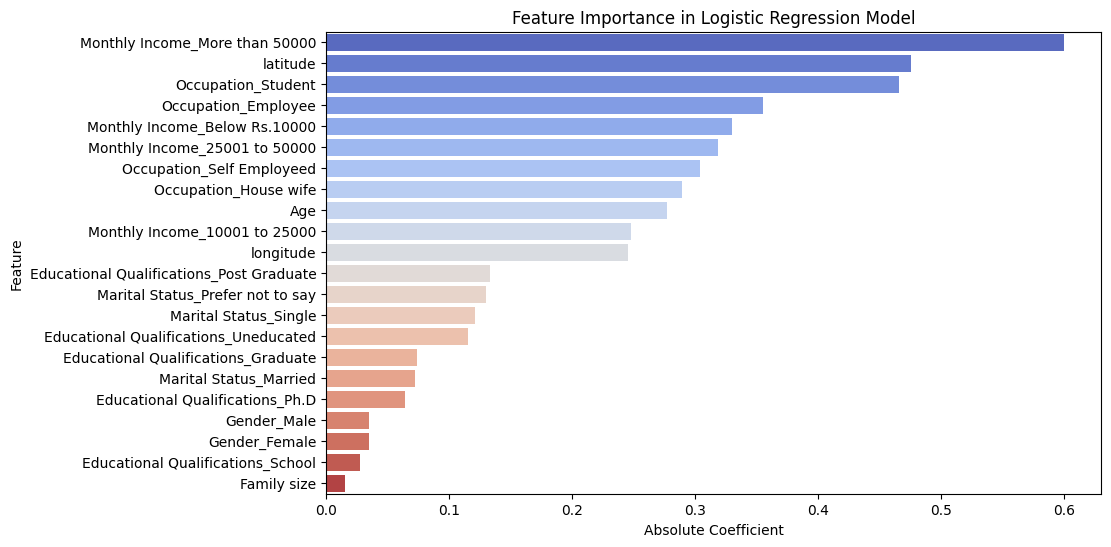

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

1. **Monthly Income_More than 50000**: This feature likely has a strong positive influence on predicting positive feedback. Customers with higher incomes may have higher expectations and might be more discerning in their feedback, leading to a stronger correlation with positive ratings.

2. **Latitude**: Geographical location can influence the availability of restaurants, types of cuisines, and overall dining culture, all of which can impact feedback on online food orders.

3. **Occupation_Student**: Students may have specific preferences and constraints related to their lifestyle and budget, which could influence their feedback on online food orders.

4. **Occupation_Employee**: Employees may prioritize convenience and reliability in their food orders due to their busy schedules, which can impact feedback.

5. **Monthly Income_Below Rs.10000**: Lower income levels may correlate with different expectations and priorities, potentially impacting feedback on online food orders.

6. **Monthly Income_25001 to 50000**: Similarly, customers in this income bracket may have specific expectations and preferences, affecting their feedback.

7. **Occupation_Self Employed**: Self-employed individuals may have flexible schedules and varying income levels, which could influence their feedback on online food orders.

8. **Occupation_Housewife**: Housewives may prioritize factors such as affordability, convenience, and family preferences, which can impact their feedback.

9. **Age**: Different age groups may have varying preferences, technological proficiency, and dining habits, influencing their feedback on online food orders.

10. **Monthly Income_10001 to 25000**: This income bracket likely represents a significant portion of customers, and their feedback can be influenced by their specific financial situation and preferences.

11. **Longitude**: Similar to latitude, longitude represents geographical location and can impact the availability of restaurants and cuisines, affecting feedback.

12. **Educational Qualifications_Post Graduate**: Higher education levels may correlate with specific preferences, dietary restrictions, or expectations, influencing feedback.

13. **Marital Status_Prefer not to say**: Customers who prefer not to disclose their marital status may have diverse preferences and priorities, impacting feedback.

14. **Marital Status_Single**: Single individuals may have different dining habits and preferences compared to married individuals, affecting their feedback on online food orders.

15. **Educational Qualifications_Uneducated**: This category may represent customers with varying levels of exposure to different cuisines and dining experiences, influencing feedback.

16. **Educational Qualifications_Graduate**: Graduates may have specific preferences and expectations based on their educational background, impacting feedback.

17. **Marital Status_Married**: Married individuals may prioritize factors such as family preferences and budget considerations, affecting their feedback.

18. **Educational Qualifications_Ph.D**: Customers with a Ph.D. may have distinct preferences and expectations, influencing their feedback on online food orders.

19. **Gender_Male**: Gender can play a role in food preferences, ordering habits, and expectations, potentially influencing feedback on online food orders.

20. **Gender_Female**: Similarly, female customers may have different preferences and expectations compared to male customers, impacting feedback.

21. **Educational Qualifications_School**: Customers with school-level education may have varying preferences and expectations, influencing their feedback on online food orders.

22. **Family size**: Despite its lower coefficient, family size can still have an impact on feedback, particularly regarding considerations such as portion sizes, affordability, and variety, especially for larger families.

#### **2. Prediction Insights:** Visualize the distribution of predicted probabilities. Discuss any patterns or insights you can derive from how the model makes predictions.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


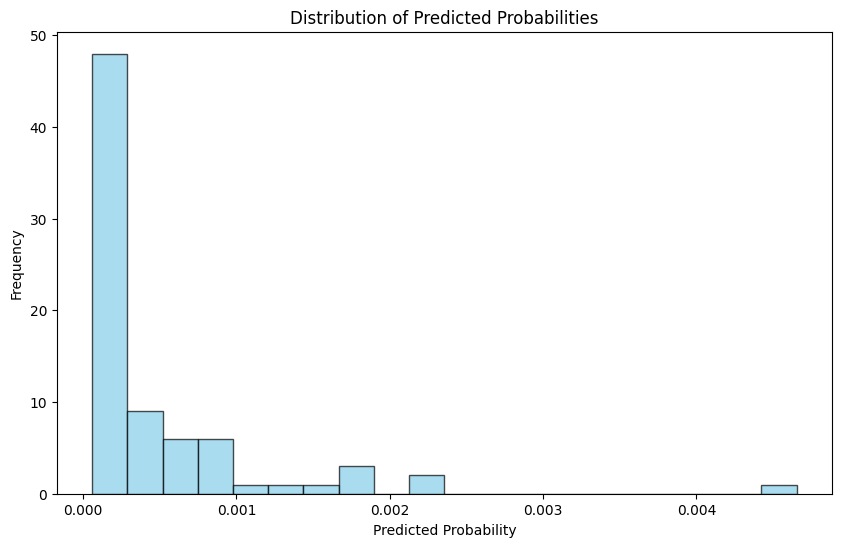

In [ ]:
# Distribution of predicted probabilities
probabilities = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(probabilities, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

> **There's a steep descent in frequency between predicted probabilities of 0.000 and 0.001, it suggests that the model is confident in assigning very low probabilities to certain observations. This pattern may indicate that the model is effectively distinguishing between instances where it's highly confident that the feedback will be negative.**